# Fig S5

## Set Up

In [1]:
library(tidyverse)
library(patchwork)
library(hise)
plotdim <- function(w=7, h=7){
    options(repr.plot.height = h, repr.plot.width = w)
}

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.2”
Warning message:
“package ‘readr’ was built under R version 4.3.2”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


## Variables

In [2]:
ig_genes <- c('IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE')

In [3]:
isotype_lev <- c('IGHM','IGHM;IGHD','IGHD','IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHE','undetermined')
isotype_cols <- c('#664a5b','#d3764a','#b64e3e','#c5d996','#99c087','#568a6a','#337066','#012a36','#a5bdca','#8A2E4C','#D1D2D4')
names(isotype_cols) <- isotype_lev

In [7]:
b_types = c(
    'Core naive B cell','Core memory B cell','Transitional B cell','CD27+ effector B cell',
    'ISG+ naive B cell','CD27- effector B cell','Type 2 polarized memory B cell',
    'Plasma cell','CD95 memory B cell','Early memory B cell','Activated memory B cell',
    'Activated memory B cell_uk1'
)
bmem_types = c(
    'Core memory B cell','CD27+ effector B cell','CD27- effector B cell','Type 2 polarized memory B cell',
    'CD95 memory B cell','Early memory B cell','Activated memory B cell'
)
bother_types = c(
    'Core naive B cell','Transitional B cell','ISG+ naive B cell','Plasma cell'
)

## Data 

### Download

In [5]:
in_fid <- list('388f0c99-51c9-4c6e-b476-8d76ff9eff8a')

In [6]:
hise::cacheFiles(in_fid)

Failed to download files:



### Read and Format

In [4]:
counts05 <- read.csv("./cache/388f0c99-51c9-4c6e-b476-8d76ff9eff8a/adata-all-b_isotypes_cutoff0.5.csv")%>%
    mutate(type = ifelse(grepl("naive", AIFI_L3_new), "Naive",
                         ifelse(grepl("Transitional", AIFI_L3_new), "Trans.","Memory")))%>%
    mutate(sample_celltype = paste0(sample.sampleKitGuid, "_", AIFI_L3_new)) 

In [5]:
dat_long0.5 <- counts05 %>%
    gather(key = gene, value = norm_counts, all_of(ig_genes))

In [8]:
bmem_counts05 <- counts05 %>%
    filter(AIFI_L3_new %in% bmem_types)

## Panel D

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

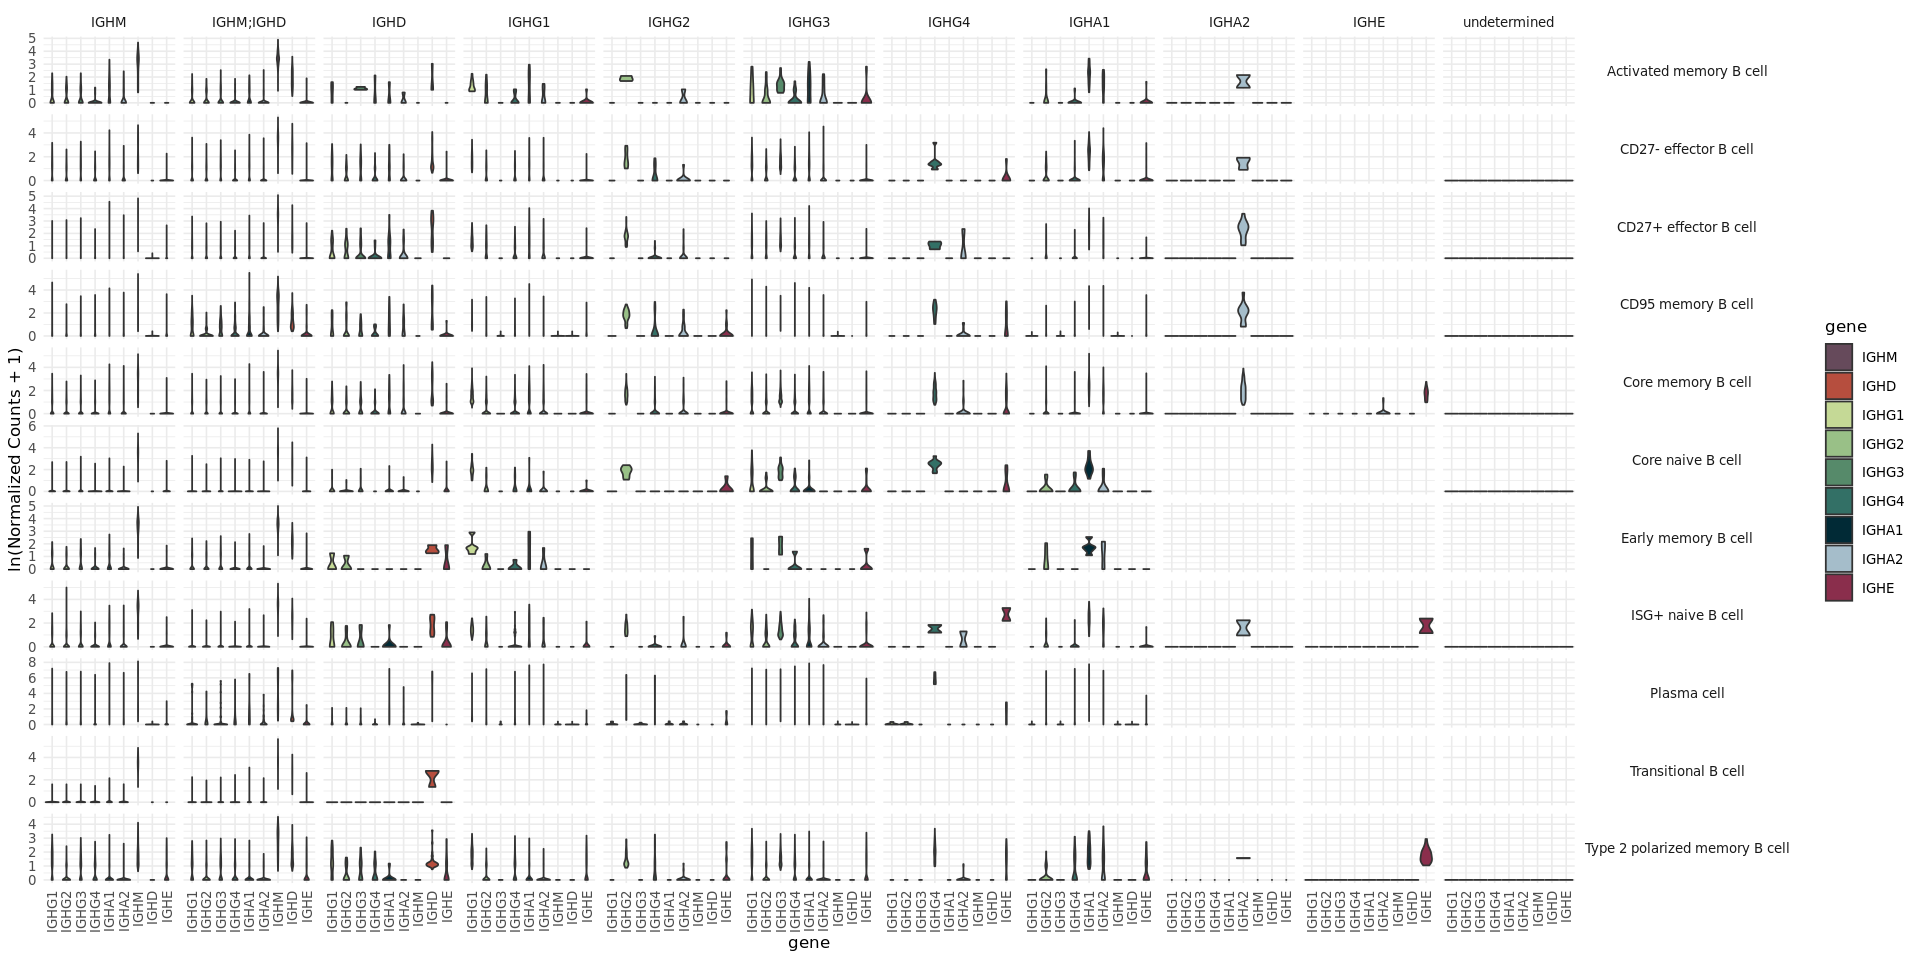

In [14]:
plotdim(16, 8)
g_isotypes_all_violin <- dat_long0.5 %>%
    mutate(gene = factor(gene, levels = ig_genes)) %>%
    mutate(isotype = factor(isotype, levels = isotype_lev)) %>%
    mutate(log1p_norm = log1p(norm_counts)) %>%
    ggplot(aes(gene, log1p_norm)) +
        geom_violin(aes(fill = gene))  +
        ylab("ln(Normalized Counts + 1)") +
        scale_fill_manual(values = isotype_cols, breaks = names(isotype_cols)) +
        guides(color = guide_legend(override.aes = list(size = 6, alpha = 1))) +
        facet_grid(AIFI_L3_new~isotype,  scales = 'free') +
        theme_minimal(base_size = 10) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), strip.text.y = element_text(angle = 0))
g_isotypes_all_violin

In [66]:
ggsave("_output/certpro/fig/altra_by-b-type_isotype_igh-violin_cutoff0.5_small.pdf", plot = g_isotypes_all_violin, device = 'pdf', height = 8, width = 16, dpi = 200)

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

In [12]:
ggsave("_output/certpro/fig/altra_Bmem_leiden0.8-89_isotype_composition_cutoff0.5_4x4_bw-nogrid.pdf", plot = g_bmem_cluster_05_89, 
       device = 'pdf', height = 4, width = 4, dpi = 600)

## Session Info

In [13]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/env/ra_scrna/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] hise_2.16.0     patchwork_1.2.0 lubridate_1.9.3 forcats_1.0.0  
 [5] stringr_1.5.1   dplyr_1.1.4     purrr_1.0.2     readr_2.1.5    
 [9] tidyr_1.3.1     tibble_3.2.1    ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] utf8_1.2.4        generics_0.1.3    bitops